# Generating some plots

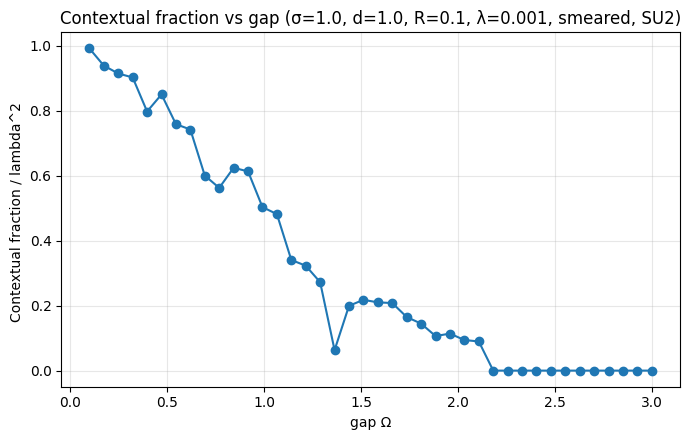

In [44]:
# Contextual Fraction vs gap (Ω)
import sys, os
from pathlib import Path

# Robustly ensure 'src' is on sys.path (works whether CWD is repo root or notebooks/)
for p in [Path.cwd(), *Path.cwd().parents]:
    cand = p / "src"
    if cand.exists():
        sys.path.insert(0, str(cand))
        break

import numpy as np
import matplotlib.pyplot as plt


# Prefer experimental (stable integrals); fallback to qutrits implementation
try:
    from qft.udw_experimental import detector_state  # preferred
except ImportError:
    from qft.udw_qutrits import detector_state       # fallback

from optimization.lin_prog import contextual_fraction
from utils.state_checks import is_valid_state, validate_and_print

# Fixed parameters
switching = 1.0
separation = 1.0
smearing = 0.1
lam = 1e-3
regulator = 1.0
regularization = "magical"  # used by Q_term but detector_type/group decide which terms contribute

# You can toggle these if you want SU2 instead
group = "SU2"            # or "SU2"
detector_type = "smeared"  # or "point_like"

# Sweep gaps
gaps = np.linspace(0.1, 3.0, 40)  # avoid zero to keep numerics well-behaved
cf_vals = []

for gap in gaps:
    rho = detector_state(
        gap=gap,
        switching=switching,
        separation=gap,
        regulator=regulator,
        smearing=smearing,
        regularization=regularization,
        detector_type=detector_type,
        group=group,
        lam=lam,
    )
    if is_valid_state(rho):
        res = contextual_fraction(rho)
        if not res.get("success", False):
            cf_vals.append(np.nan)

        else:
            cf_vals.append(res.get("b", np.nan))
    else:
        validate_and_print(rho)

cf_vals = np.array(cf_vals)*(1/lam**2)

plt.figure(figsize=(7,4.5))
plt.plot(gaps, cf_vals, marker="o", lw=1.5)
plt.xlabel("gap Ω")
plt.ylabel("Contextual fraction / lambda^2 ")
plt.title(f"Contextual fraction vs gap (σ={switching}, d={separation}, R={smearing}, λ={lam}, {detector_type}, {group})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Contextual Fraction vs separation
import sys, os
from pathlib import Path

# Robustly ensure 'src' is on sys.path (works whether CWD is repo root or notebooks/)
for p in [Path.cwd(), *Path.cwd().parents]:
    cand = p / "src"
    if cand.exists():
        sys.path.insert(0, str(cand))
        break

import numpy as np
import matplotlib.pyplot as plt

# Prefer experimental (stable integrals); fallback to qutrits implementation
try:
    from qft.udw_experimental import detector_state  # preferred
except ImportError:
    from qft.udw_qutrits import detector_state       # fallback

from optimization.lin_prog import contextual_fraction
from utils.state_checks import is_valid_state, validate_and_print

# Fixed parameters
switching = 1.0
gap = 1.0
# separation = 1.0
smearing = 0.1
lam = 1e-2
regulator = 1.0
regularization = "heaviside"  # used by Q_term but detector_type/group decide which terms contribute

# You can toggle these if you want SU2 instead
group = "SU2"            # or "SU2"
detector_type = "point_like"  # or "point_like"

# Sweep separations
separations = np.linspace(0.1, 2, 100)  # avoid zero to keep numerics well-behaved
cf_vals = []

for separation in separations:
    rho = detector_state(
        gap=gap,
        switching=switching,
        separation=separation,
        regulator=regulator,
        smearing=smearing,
        regularization="delta",
        detector_type=detector_type,
        group=group,
        lam=lam,
    )
    if is_valid_state(rho):
        res = contextual_fraction(rho)
        if not res.get("success", False):
            cf_vals.append(np.nan)

        else:
            cf_vals.append(res.get("b", np.nan))
    else:
        validate_and_print(rho)

cf_vals = np.array(cf_vals)*(1/lam**2)

plt.figure(figsize=(7,4.5))
plt.plot(separations, cf_vals, marker="o", lw=1.5)
plt.xlabel("separation")
plt.ylabel("Contextual fraction / lambda^2 ")
plt.title(f"Contextual fraction vs separation (σ={switching}, R={smearing}, λ={lam}, {detector_type}, {group})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
# Contextual Fraction vs lambda
import sys, os
from pathlib import Path

# Robustly ensure 'src' is on sys.path (works whether CWD is repo root or notebooks/)
for p in [Path.cwd(), *Path.cwd().parents]:
    cand = p / "src"
    if cand.exists():
        sys.path.insert(0, str(cand))
        break

import numpy as np
import matplotlib.pyplot as plt
from utils.state_checks import is_valid_state, validate_and_print

# Prefer experimental (stable integrals); fallback to qutrits implementation
try:
    from qft.udw_experimental import detector_state  # preferred
except ImportError:
    from qft.udw_qutrits import detector_state       # fallback

from optimization.lin_prog import contextual_fraction

# Fixed parameters
switching = 1.0
gap = 1.0
separation = 10
smearing = 0.5
# lam = 1e-2
regulator = 1.0
regularization = "heaviside"  # used by Q_term but detector_type/group decide which terms contribute

# You can toggle these if you want SU2 instead
group = "SU2"            # or "SU2"
detector_type = "point_like"
# detector_type = "smeared"

# # Sweep separations
# lams = np.linspace(1, 8, 100)  # avoid zero to keep numerics well-behaved
# cf_vals = []

# for l in lams:
#     lam = l*1e-4
#     rho = detector_state(
#         gap=gap,
#         switching=switching,
#         separation=separation,
#         regulator=regulator,
#         smearing=smearing,
#         regularization="delta",
#         detector_type=detector_type,
#         group=group,
#         lam= lam
#     )
#     if is_valid_state(rho):
#         res = contextual_fraction(rho)
#         if not res.get("success", False):
#             cf_vals.append(np.nan)

#         else:
#             cf_vals.append(res.get("b", np.nan)*(1/lam**2))
#     else:
#         validate_and_print(rho)


# cf_vals = np.array(cf_vals)

# plt.figure(figsize=(7,4.5))
# plt.plot(lams, cf_vals, marker="o", lw=1.5)
# plt.xlabel("lambda")
# plt.ylabel("Contextual fraction / lambda^2 ")
# plt.title(f"Contextual fraction vs lambda (σ={switching}, R={smearing}, λ={lam}, {detector_type}, {group})")
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


r = detector_state(
    gap=gap,
    switching=switching,
    separation=separation,
    regulator=regulator,
    smearing=smearing,
    regularization="delta",
    detector_type=detector_type,
    group=group,
    lam=2*1e-4
)

b = contextual_fraction(r)['result'].x
print(b)

print (np.sum(b))

[ 1.11111111e-01  0.00000000e+00  0.00000000e+00  1.11111111e-01
  0.00000000e+00  0.00000000e+00  1.11111111e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.21587092e-10
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.21587475e-10  0.00000000e+00  0.00000000e+00  1.11111111e-01
  0.00000000e+00 -0.00000000e+00  1.11111111e-01  0.00000000e+00
  0.00000000e+00  1.11111111e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.21587092e-10  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11111111e-01  0.00000000e+00
  0.00000000e+00  1.11111111e-01  0.00000000e+00  0.00000000e+00
  1.11111111e-01  0.00000